# importing

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_csv('D:/programming/python tenx/Solar-Data-Discovery/data/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])


# Summary Stats & Missing Values

In [3]:
print("Summary Statistics")
print(df.describe())

print("\nMissing Values per Column")
print(df.isna().sum())

missing_pct = df.isna().mean() * 100
print("\nColumns with >5% Missing")
print(missing_pct[missing_pct > 5])

Summary Statistics
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      23.100000   
50%  

# Outlier Detection & Cleaning

In [4]:
focus_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[focus_cols].apply(lambda x: zscore(x, nan_policy='omit'))
outlier_flags = (z_scores.abs() > 3)

print("\nOutlier Counts")
print(outlier_flags.sum())


Outlier Counts
GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64


# Export Cleaned Data

In [13]:
clean_path = 'D:/programming/python tenx/Solar-Data-Discovery/data/sierraleone_clean.csv'
df.to_csv(clean_path, index=False)
print(f"\nCleaned data saved to {clean_path}")


Cleaned data saved to D:/programming/python tenx/Solar-Data-Discovery/data/sierraleone_clean.csv


# Time Series Analysis Plots

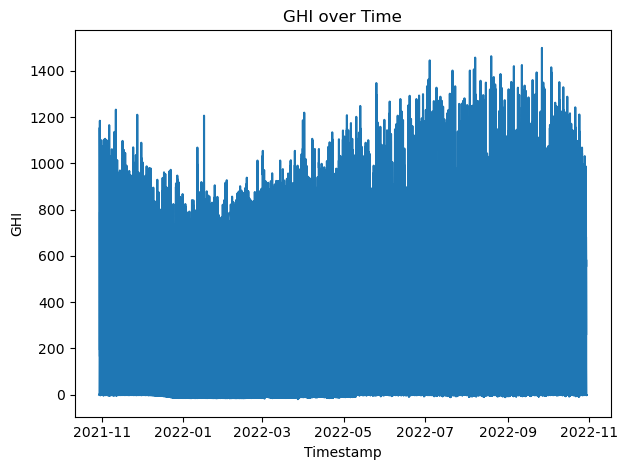

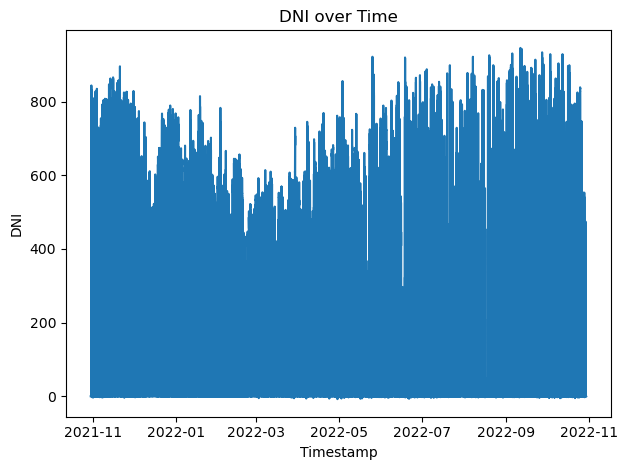

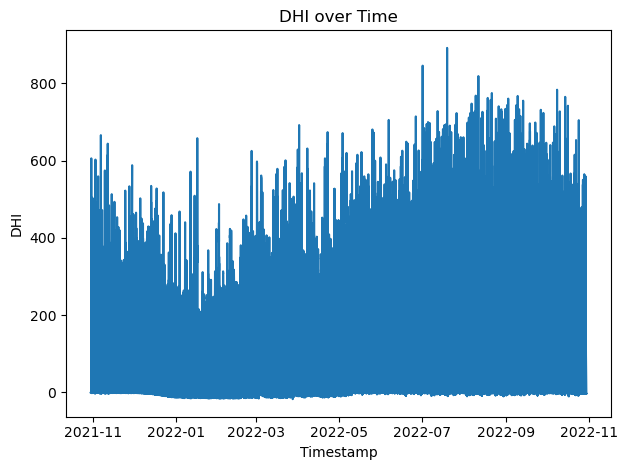

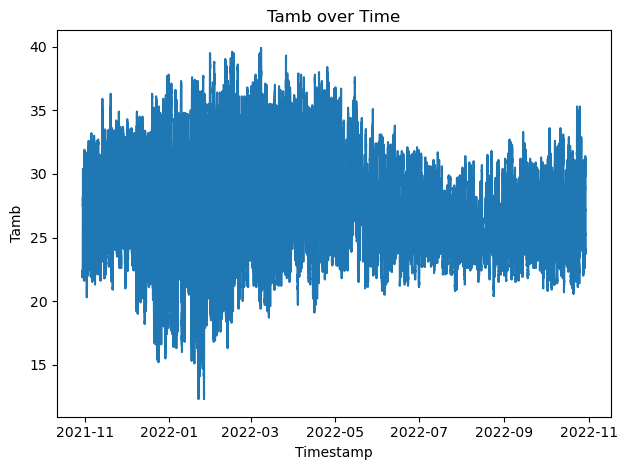

In [7]:
for var in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.figure()
    plt.plot(df['Timestamp'], df[var])
    plt.title(f'{var} over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

#  Cleaning Impact

In [8]:
print("\nCleaning Impact")
print(f"Average ModA: {df['ModA'].mean():.2f}")
print(f"Average ModB: {df['ModB'].mean():.2f}")


Cleaning Impact
Average ModA: 206.64
Average ModB: 198.11


# Correlation Heatmap

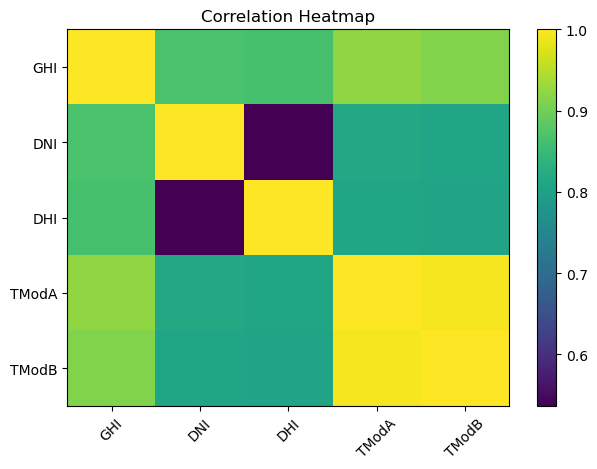

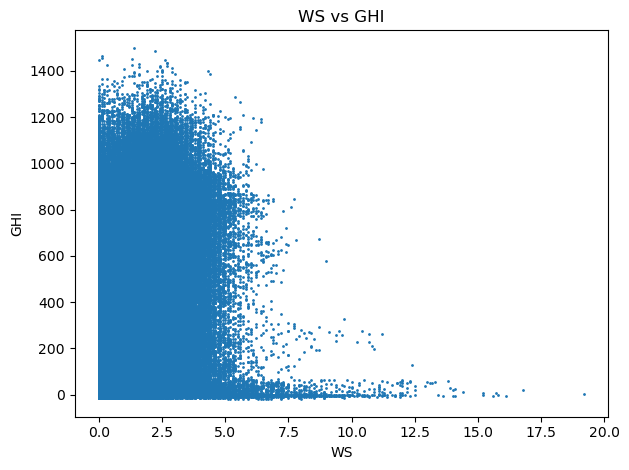

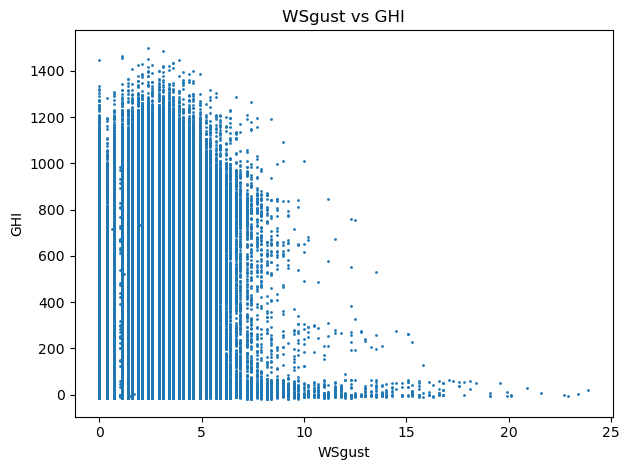

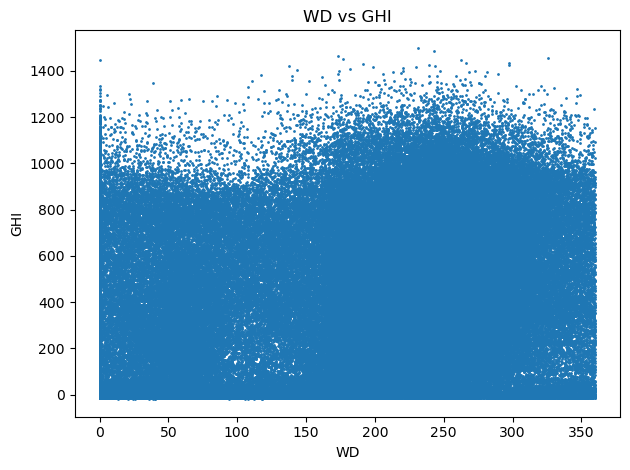

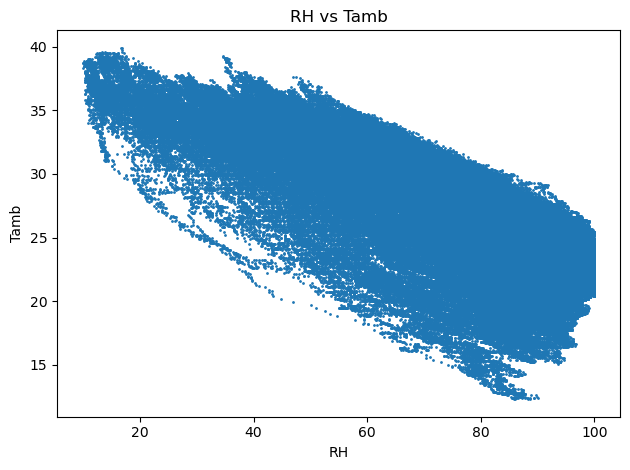

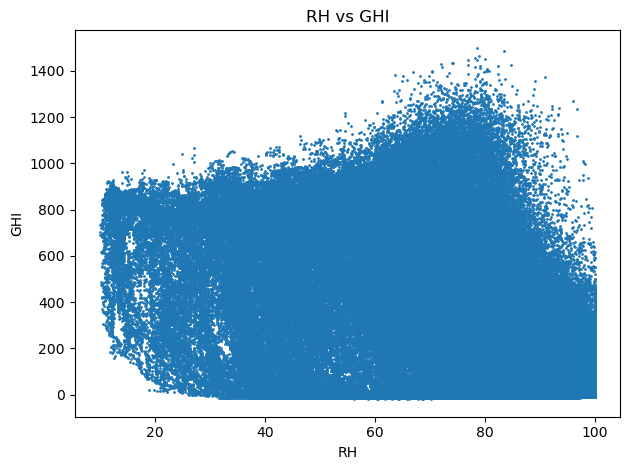

In [9]:
corr_df = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure()
plt.imshow(corr_df, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_df)), corr_df.columns, rotation=45)
plt.yticks(range(len(corr_df)), corr_df.index)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

pairs = [
    ('WS', 'GHI'), ('WSgust', 'GHI'), ('WD', 'GHI'),
    ('RH', 'Tamb'), ('RH', 'GHI')
]
for x, y in pairs:
    plt.figure()
    plt.scatter(df[x], df[y], s=1)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

# Wind Rose (polar histogram) & Histograms

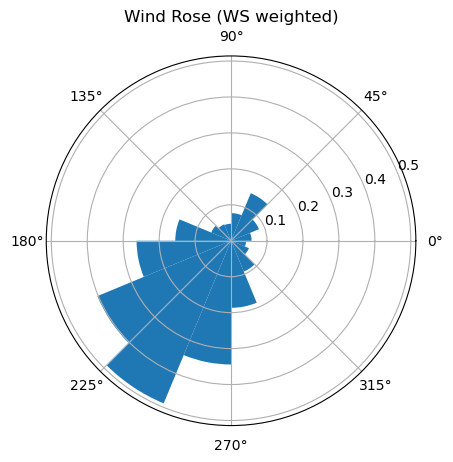

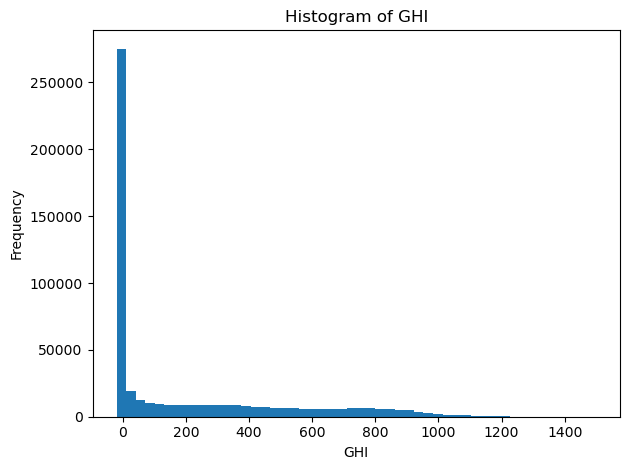

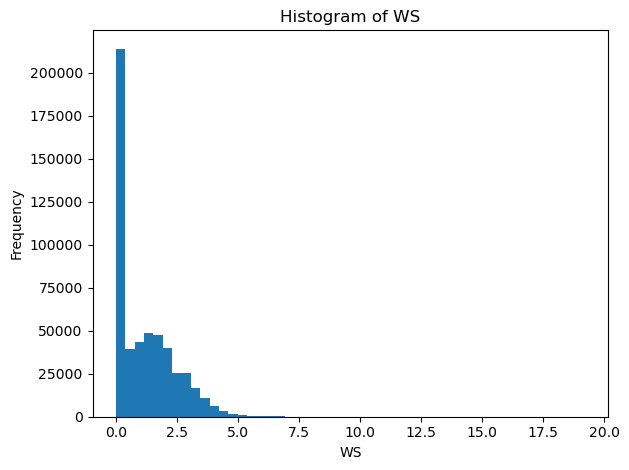

In [10]:
wd_rad = np.deg2rad(df['WD'])
plt.figure()
ax = plt.subplot(projection='polar')
ax.hist(wd_rad, bins=16, weights=df['WS'], density=True)
ax.set_title('Wind Rose (WS weighted)')
plt.show()

for var in ['GHI', 'WS']:
    plt.figure()
    plt.hist(df[var].dropna(), bins=50)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Temp & RH Relationship

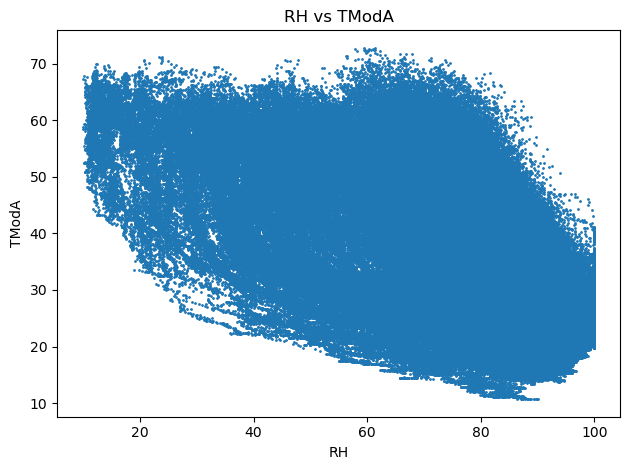

In [11]:
plt.figure()
plt.scatter(df['RH'], df['TModA'], s=1)
plt.title('RH vs TModA')
plt.xlabel('RH')
plt.ylabel('TModA')
plt.tight_layout()
plt.show()

# Bubble Chart: GHI vs Tamb, size = RH

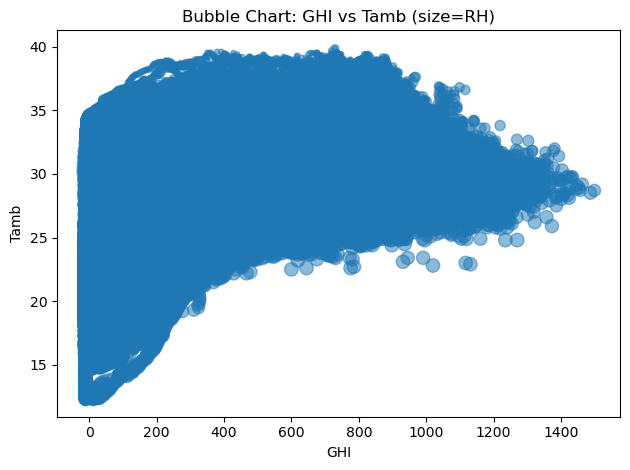

In [12]:
plt.figure()
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.title('Bubble Chart: GHI vs Tamb (size=RH)')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.tight_layout()
plt.show()